In [23]:
from typing import List
import markdown2
from langchain.document_loaders.unstructured import UnstructuredFileLoader

class UnstructuredMarkdownLoader(UnstructuredFileLoader):
    """UnstructuredMarkdownLoader uses unstructured to load markdown files.
    You can run the loader in one of two modes: "single" and "elements".
    If you use "single" mode, the document will be returned as a single
    langchain Document object. If you use "elements" mode, the unstructured
    library will split the document into elements such as Title and NarrativeText.
    You can pass in additional unstructured kwargs after mode to apply
    different unstructured settings.

    Examples
    --------
    from langchain.document_loaders import UnstructuredMarkdownLoader

    loader = UnstructuredMarkdownLoader(
        "example.md", mode="elements", strategy="fast",
    )
    docs = loader.load()

    References
    ----------
    https://unstructured-io.github.io/unstructured/bricks.html#partition-md
    """

    def _get_elements(self) -> List:
        with open(self.file_path, 'r', encoding='utf-8') as f:
            markdown_content = f.read()

        # Parse the markdown content, including code blocks
        md = markdown2.Markdown()
        html_content = md.convert(markdown_content)

        # Extract elements from the parsed content
        elements = []
        current_element = None
        for line in html_content.splitlines():
            if line.strip().startswith('<h'):
                # Handle headers
                if current_element is not None:
                    elements.append(current_element)
                current_element = {'type': 'Title', 'content': line.strip()}
            elif line.strip().startswith('<p'):
                # Handle narrative text
                if current_element is not None:
                    elements.append(current_element)
                current_element = {'type': 'NarrativeText', 'content': line.strip()}
            else:
                # Handle code blocks
                if current_element is not None and 'code' not in current_element:
                    current_element['code'] = line.strip()
                elif current_element is not None and 'code' in current_element:
                    current_element['code'] += '\n' + line.strip()

        if current_element is not None:
            elements.append(current_element)

        return elements


In [24]:
loader = UnstructuredMarkdownLoader(
    "test_mds\docs_integrations_agent_with_wandb_tracing.md", mode="single", strategy="slow",
)
docs = loader.load()

[Document(page_content='{\'type\': \'Title\', \'content\': \'<h1>WandB Tracing</h1>\', \'code\': \'\'}\n\n{\'type\': \'NarrativeText\', \'content\': \'<p>There are two recommended ways to trace your LangChains:</p>\', \'code\': \'\\n<ol>\\n<li>Setting the <code>LANGCHAIN_WANDB_TRACING</code> environment variable to "true".</li>\\n<li>Using a context manager with tracing_enabled() to trace a particular block of code.</li>\\n</ol>\\n\'}\n\n{\'type\': \'NarrativeText\', \'content\': "<p><strong>Note</strong> if the environment variable is set, all code will be traced, regardless of whether or not it\'s within the context manager.</p>", \'code\': \'\'}\n\n{\'type\': \'NarrativeText\', \'content\': \'<pre><code>import osos.environ["LANGCHAIN_WANDB_TRACING"] = "true"# wandb documentation to configure wandb using env variables# https://docs.wandb.ai/guides/track/advanced/environment-variables# here we are configuring the wandb project nameos.environ["WANDB_PROJECT"] = "langchain-tracing"from 
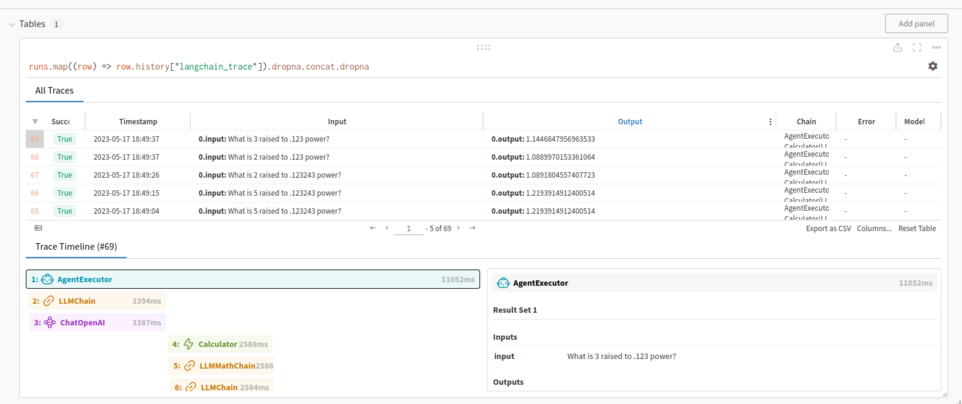

In [25]:
docs

In [1]:
from langchain.document_loaders import TextLoader

loader = TextLoader("test_mds\docs_integrations_openai.md")
loader.load()

[Document(page_content='OpenAI\n======\n\n> [OpenAI](https://en.wikipedia.org/wiki/OpenAI) is American artificial intelligence (AI) research laboratory consisting of the non-profit `OpenAI Incorporated` and its for-profit subsidiary corporation `OpenAI Limited Partnership`. `OpenAI` conducts AI research with the declared intention of promoting and developing a friendly AI. `OpenAI` systems run on an `Azure`\\-based supercomputing platform from `Microsoft`.\n\n> The [OpenAI API](https://platform.openai.com/docs/models) is powered by a diverse set of models with different capabilities and price points.\n> \n> [ChatGPT](https://chat.openai.com) is the Artificial Intelligence (AI) chatbot developed by `OpenAI`.\n\nInstallation and Setup[â€‹](#installation-and-setup "Direct link to Installation and Setup")\n------------------------------------------------------------------------------------------\n\n*   Install the Python SDK with\n\n    pip install openai\n\n*   Get an OpenAI api key and s

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 2000,
    chunk_overlap  = 20,
    length_function = len,
)

In [6]:
# This is a long document we can split up.
with open('test_mds\docs_integrations_openai.md') as f:
    state_of_the_union = f.read()

In [7]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0])
print(texts[1])

page_content='OpenAI\n======\n\n> [OpenAI](https://en.wikipedia.org/wiki/OpenAI) is American artificial intelligence (AI) research laboratory consisting of the non-profit `OpenAI Incorporated` and its for-profit subsidiary corporation `OpenAI Limited Partnership`. `OpenAI` conducts AI research with the declared intention of promoting and developing a friendly AI. `OpenAI` systems run on an `Azure`\\-based supercomputing platform from `Microsoft`.\n\n> The [OpenAI API](https://platform.openai.com/docs/models) is powered by a diverse set of models with different capabilities and price points.\n> \n> [ChatGPT](https://chat.openai.com) is the Artificial Intelligence (AI) chatbot developed by `OpenAI`.\n\nInstallation and Setup[â€‹](#installation-and-setup "Direct link to Installation and Setup")\n------------------------------------------------------------------------------------------\n\n*   Install the Python SDK with\n\n    pip install openai\n\n*   Get an OpenAI api key and set it as a

In [15]:
# Load Notion page as a markdownfile file
from langchain.document_loaders import NotionDirectoryLoader

path = "langchain_python_docs/"
loader = NotionDirectoryLoader(path)
docs = loader.load()


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 3509: character maps to <undefined>

[Document(page_content='WandB Tracing\n=============\n\nThere are two recommended ways to trace your LangChains:\n\n1.  Setting the `LANGCHAIN_WANDB_TRACING` environment variable to "true".\n2.  Using a context manager with tracing\\_enabled() to trace a particular block of code.\n\n**Note** if the environment variable is set, all code will be traced, regardless of whether or not it\'s within the context manager.\n\n    import osos.environ["LANGCHAIN_WANDB_TRACING"] = "true"# wandb documentation to configure wandb using env variables# https://docs.wandb.ai/guides/track/advanced/environment-variables# here we are configuring the wandb project nameos.environ["WANDB_PROJECT"] = "langchain-tracing"from langchain.agents import initialize_agent, load_toolsfrom langchain.agents import AgentTypefrom langchain.llms import OpenAIfrom langchain.callbacks import wandb_tracing_enabled\n\n    # Agent run with tracing. Ensure that OPENAI_API_KEY is set appropriately to run this example.llm = OpenAI(t
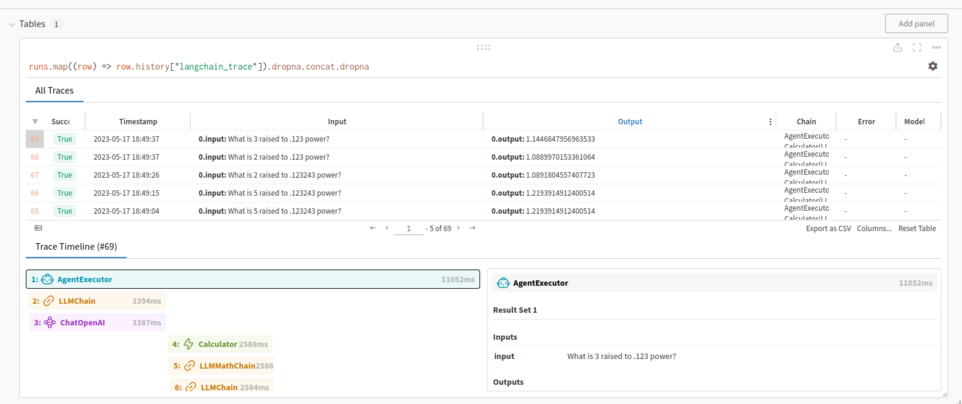

In [11]:
docs

In [12]:
md_file = docs[0].page_content

In [13]:
# Let's create groups based on the section headers in our page
from langchain.text_splitter import MarkdownHeaderTextSplitter

headers_to_split_on = [
    ("###", "Section"),
]
markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(md_file)

[Document(page_content='WandB Tracing\n=============  \nThere are two recommended ways to trace your LangChains:  \n1.  Setting the `LANGCHAIN_WANDB_TRACING` environment variable to "true".\n2.  Using a context manager with tracing\\_enabled() to trace a particular block of code.  \n**Note** if the environment variable is set, all code will be traced, regardless of whether or not it\'s within the context manager.  \nimport osos.environ["LANGCHAIN_WANDB_TRACING"] = "true"# wandb documentation to configure wandb using env variables# https://docs.wandb.ai/guides/track/advanced/environment-variables# here we are configuring the wandb project nameos.environ["WANDB_PROJECT"] = "langchain-tracing"from langchain.agents import initialize_agent, load_toolsfrom langchain.agents import AgentTypefrom langchain.llms import OpenAIfrom langchain.callbacks import wandb_tracing_enabled  \n# Agent run with tracing. Ensure that OPENAI_API_KEY is set appropriately to run this example.llm = OpenAI(temperatu
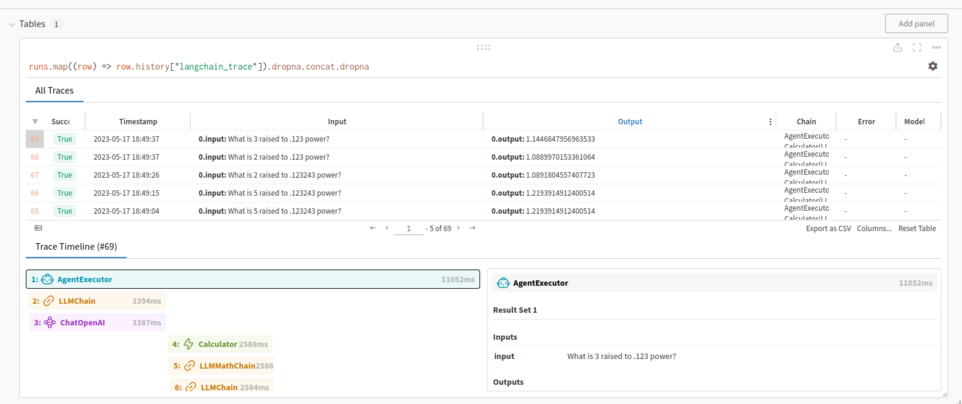

In [14]:
md_header_splits

In [16]:
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import TextLoader

In [32]:
text_loader_kwargs={'autodetect_encoding': True}

loader = DirectoryLoader('./langchain_python_docs', glob="**/*.md", loader_cls=TextLoader,loader_kwargs=text_loader_kwargs, silent_errors=True)

In [33]:
docs = loader.load()

In [34]:
len(docs)

760

In [35]:
docs[3]

Document(page_content='Chroma\n======\n\n> [Chroma](https://docs.trychroma.com/getting-started) is a database for building AI applications with embeddings.\n\nInstallation and Setup[â€‹](#installation-and-setup "Direct link to Installation and Setup")\n------------------------------------------------------------------------------------------\n\n    pip install chromadb\n\nVectorStore[â€‹](#vectorstore "Direct link to VectorStore")\n---------------------------------------------------------\n\nThere exists a wrapper around Chroma vector databases, allowing you to use it as a vectorstore, whether for semantic search or example selection.\n\n    from langchain.vectorstores import Chroma\n\nFor a more detailed walkthrough of the Chroma wrapper, see [this notebook](/docs/modules/data_connection/vectorstores/integrations/chroma.html)\n\nRetriever[â€‹](#retriever "Direct link to Retriever")\n---------------------------------------------------\n\nSee a [usage example](/docs/modules/data_connect

In [100]:
from langchain.document_loaders import UnstructuredMarkdownLoader

In [101]:
markdown_path = "test.md"
loader = UnstructuredMarkdownLoader(markdown_path)

In [102]:
data = loader.load()

In [103]:
data

[Document(page_content='Simulated Environment: Gymnasium\n\nFor many applications of LLM agents, the environment is real (internet,\ndatabase, REPL, etc). However, we can also define agents to interact in\nsimulated environments like text-based games. This is an example of how to\ncreate a simple agent-environment interaction loop with\nGymnasium (formerly OpenAI\nGym).\n\nDefine the agent\n\nInitialize the simulated environment and agent\n\nMain loop', metadata={'source': 'test.md'})]

In [99]:
import markdown
import html2text

markdown_path = "langchain_docs_pyer\en_latest_use_cases_agent_simulations_gymnasium.md"

# Read the markdown content from the file
with open(markdown_path, "r", encoding="utf-8") as file:
    markdown_content = file.read()

# Parse the markdown using the markdown library
html_content = markdown.markdown(markdown_content)

# Convert HTML to Markdown using html2text
markdown_text = html2text.html2text(html_content)

print(markdown_text)

with open("test.md",'w') as file:
    file.write(markdown_text)


# Simulated Environment: Gymnasium

For many applications of LLM agents, the environment is real (internet,
database, REPL, etc). However, we can also define agents to interact in
simulated environments like text-based games. This is an example of how to
create a simple agent-environment interaction loop with
[Gymnasium](https://github.com/Farama-Foundation/Gymnasium) (formerly [OpenAI
Gym](https://github.com/openai/gym)).

    
    
    pip install gymnasium
    
    import gymnasium as gymimport inspectimport tenacityfrom langchain.chat_models import ChatOpenAIfrom langchain.schema import (    AIMessage,    HumanMessage,    SystemMessage,    BaseMessage,)from langchain.output_parsers import RegexParser
    

## Define the agent

    
    
    class GymnasiumAgent:    @classmethod    def get_docs(cls, env):        return env.unwrapped.__doc__    def __init__(self, model, env):        self.model = model        self.env = env        self.docs = self.get_docs(env)        self.instruction

In [94]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [98]:
headers_to_split_on = [
    ("##", "Header 2")
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on,return_each_line=True)
md_header_splits = markdown_splitter.split_text(markdown_text)
md_header_splits

[Document(page_content='# Simulated Environment: Gymnasium', metadata={}),
 Document(page_content='For many applications of LLM agents, the environment is real (internet,\ndatabase, REPL, etc). However, we can also define agents to interact in\nsimulated environments like text-based games. This is an example of how to\ncreate a simple agent-environment interaction loop with\n[Gymnasium](https://github.com/Farama-Foundation/Gymnasium) (formerly [OpenAI\nGym](https://github.com/openai/gym)).', metadata={}),
 Document(page_content='pip install gymnasium', metadata={}),
 Document(page_content='import gymnasium as gymimport inspectimport tenacityfrom langchain.chat_models import ChatOpenAIfrom langchain.schema import (    AIMessage,    HumanMessage,    SystemMessage,    BaseMessage,)from langchain.output_parsers import RegexParser', metadata={}),
 Document(page_content='class GymnasiumAgent:    @classmethod    def get_docs(cls, env):        return env.unwrapped.__doc__    def __init__(self,

In [104]:
import markdown
import html2text
import re

markdown_path = "langchain_docs_pyer/en_latest_use_cases_agent_simulations_gymnasium.md"

# Read the markdown content from the file
with open(markdown_path, "r", encoding="utf-8") as file:
    markdown_content = file.read()

# Parse the markdown using the markdown library
html_content = markdown.markdown(markdown_content)

# Convert HTML to Markdown using html2text
markdown_text = html2text.html2text(html_content)

# Remove indents from the start of lines
markdown_text = re.sub(r'^\s+', '', markdown_text, flags=re.MULTILINE)

print(markdown_text)

with open("test.md", 'w') as file:
    file.write(markdown_text)


# Simulated Environment: Gymnasium
For many applications of LLM agents, the environment is real (internet,
database, REPL, etc). However, we can also define agents to interact in
simulated environments like text-based games. This is an example of how to
create a simple agent-environment interaction loop with
[Gymnasium](https://github.com/Farama-Foundation/Gymnasium) (formerly [OpenAI
Gym](https://github.com/openai/gym)).
pip install gymnasium
import gymnasium as gymimport inspectimport tenacityfrom langchain.chat_models import ChatOpenAIfrom langchain.schema import (    AIMessage,    HumanMessage,    SystemMessage,    BaseMessage,)from langchain.output_parsers import RegexParser
## Define the agent
class GymnasiumAgent:    @classmethod    def get_docs(cls, env):        return env.unwrapped.__doc__    def __init__(self, model, env):        self.model = model        self.env = env        self.docs = self.get_docs(env)        self.instructions = """Your goal is to maximize your return, i

In [123]:
import markdown
import html2text
import re

markdown_path = "langchain_docs_py\docs_ecosystem_integrations_databricks.md"

# Read the markdown content from the file
with open(markdown_path, "r", encoding="utf-8") as file:
    markdown_content = file.read()

# Parse the markdown using the markdown library
html_content = markdown.markdown(markdown_content)

# Convert HTML to Markdown using html2text
markdown_text = html2text.html2text(html_content)

# Remove indents from the start of lines with text
markdown_text = re.sub(r'^( {4,})', r'', markdown_text, flags=re.MULTILINE)

print(markdown_text)

with open("test.md", 'w', encoding="utf-8") as file:  # Specify UTF-8 encoding here
    file.write(markdown_text)


# Databricks

This notebook covers how to connect to the [Databricks
runtimes](https://docs.databricks.com/runtime/index.html) and [Databricks
SQL](https://www.databricks.com/product/databricks-sql) using the SQLDatabase
wrapper of LangChain. It is broken into 3 parts: installation and setup,
connecting to Databricks, and examples.

## Installation and Setup



pip install databricks-sql-connector


## Connecting to Databricks

You can connect to [Databricks
runtimes](https://docs.databricks.com/runtime/index.html) and [Databricks
SQL](https://www.databricks.com/product/databricks-sql) using the
`SQLDatabase.from_databricks()` method.

### Syntax



SQLDatabase.from_databricks(    catalog: str,    schema: str,    host: Optional[str] = None,    api_token: Optional[str] = None,    warehouse_id: Optional[str] = None,    cluster_id: Optional[str] = None,    engine_args: Optional[dict] = None,    **kwargs: Any)


### Required Parameters

  * `catalog`: The catalog name in the Databricks dat

In [124]:
headers_to_split_on = [
    ("##", "Header 2"),
    ("###", "Header 3")
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_text)
md_header_splits

[Document(page_content='# Databricks  \nThis notebook covers how to connect to the [Databricks\nruntimes](https://docs.databricks.com/runtime/index.html) and [Databricks\nSQL](https://www.databricks.com/product/databricks-sql) using the SQLDatabase\nwrapper of LangChain. It is broken into 3 parts: installation and setup,\nconnecting to Databricks, and examples.', metadata={}),
 Document(page_content='pip install databricks-sql-connector', metadata={'Header 2': 'Installation and Setup'}),
 Document(page_content='You can connect to [Databricks\nruntimes](https://docs.databricks.com/runtime/index.html) and [Databricks\nSQL](https://www.databricks.com/product/databricks-sql) using the\n`SQLDatabase.from_databricks()` method.', metadata={'Header 2': 'Connecting to Databricks'}),
 Document(page_content='SQLDatabase.from_databricks(    catalog: str,    schema: str,    host: Optional[str] = None,    api_token: Optional[str] = None,    warehouse_id: Optional[str] = None,    cluster_id: Optional

In [106]:
from langchain.document_loaders import UnstructuredMarkdownLoader

In [113]:
markdown_path = "test.md"
loader = UnstructuredMarkdownLoader(markdown_path)

In [114]:
data = loader.load()

In [115]:
data

[Document(page_content='Simulated Environment: Gymnasium\n\nFor many applications of LLM agents, the environment is real (internet,\ndatabase, REPL, etc). However, we can also define agents to interact in\nsimulated environments like text-based games. This is an example of how to\ncreate a simple agent-environment interaction loop with\nGymnasium (formerly OpenAI\nGym).\n\npip install gymnasium\n\nimport gymnasium as gymimport inspectimport tenacityfrom langchain.chat_models import ChatOpenAIfrom langchain.schema import (    AIMessage,    HumanMessage,    SystemMessage,    BaseMessage,)from langchain.output_parsers import RegexParser\n\nDefine the agent\n\nclass GymnasiumAgent:    @classmethod    def get_docs(cls, env):        return env.unwrapped.doc    def init(self, model, env):        self.model = model        self.env = env        self.docs = self.get_docs(env)        self.instructions = """Your goal is to maximize your return, i.e. the sum of the rewards you receive.I will give y

In [125]:
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import TextLoader

text_loader_kwargs={'autodetect_encoding': True}

loader = DirectoryLoader('./langchain_docs_pyer', glob="**/*.md", loader_cls=TextLoader,loader_kwargs=text_loader_kwargs, silent_errors=True, use_multithreading=True)

docs = loader.load()

print(len(docs))

823


In [157]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    separators=["##","\n\n", "\n", " ", ""],
    keep_separator=True,
    chunk_size = 3000,
    chunk_overlap  = 20,
    length_function = len,
)

newdocs = text_splitter.split_documents(docs)

In [158]:
len(newdocs)

2335

In [159]:
newdocs

[Document(page_content='Tutorials\n=========\n\nâ›“ icon marks a new addition \\[last update 2023-07-05\\]\n\n* * *\n\n### DeepLearning.AI courses[](#deeplearningai-courses "Direct link to DeepLearning.AI courses")\n\nby [Harrison Chase](https://github.com/hwchase17) and [Andrew Ng](https://en.wikipedia.org/wiki/Andrew_Ng)\n\n*   [LangChain for LLM Application Development](https://learn.deeplearning.ai/langchain)\n*   â›“ [LangChain Chat with Your Data](https://learn.deeplearning.ai/langchain-chat-with-your-data)\n\n### Handbook[](#handbook "Direct link to Handbook")\n\n[LangChain AI Handbook](https://www.pinecone.io/learn/langchain/) By **James Briggs** and **Francisco Ingham**\n\n### Short Tutorials[](#short-tutorials "Direct link to Short Tutorials")\n\n[LangChain Crash Course - Build apps with language models](https://youtu.be/LbT1yp6quS8) by [Patrick Loeber](https://www.youtube.com/@patloeber)\n\n[LangChain Crash Course: Build an AutoGPT app in 25 minutes](https://youtu.be/MlK6SIj

In [13]:
from langchain.document_loaders import DirectoryLoader
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from dotenv import load_dotenv

from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS

load_dotenv()

text_loader_kwargs={'autodetect_encoding': True}

loader = DirectoryLoader('./langchain_docs_python', glob="**/*.md", loader_cls=TextLoader,loader_kwargs=text_loader_kwargs, silent_errors=True, use_multithreading=True)

docs = loader.load()

print(len(docs))

text_splitter = RecursiveCharacterTextSplitter(
    separators=["##","\n\n", "\n", " ", ""],
    keep_separator=True,
    chunk_size = 3000,
    chunk_overlap  = 20,
    length_function = len,
)


newdocs = text_splitter.split_documents(docs)

print(len(newdocs))

embeddings = OpenAIEmbeddings(openai_api_key="")

# db = FAISS.from_documents(newdocs, embeddings)

823
2335


In [5]:
m_docs = db.similarity_search("chroma")

In [6]:
m_docs

[Document(page_content='Chroma\n======\n\n> [Chroma](https://docs.trychroma.com/getting-started) is a AI-native open-source vector database focused on developer productivity and happiness. Chroma is licensed under Apache 2.0.\n\nInstall Chroma with:\n\n    pip install chromadb\n\nChroma runs in various modes. See below for examples of each integrated with LangChain.\n\n*   `in-memory` - in a python script or jupyter notebook\n*   `in-memory with persistance` - in a script or notebook and save/load to disk\n*   `in a docker container` - as a server running your local machine or in the cloud\n\nLike any other database, you can:\n\n*   `.add`\n*   `.get`\n*   `.update`\n*   `.upsert`\n*   `.delete`\n*   `.peek`\n*   and `.query` runs the similarity search.\n\nView full docs at [docs](https://docs.trychroma.com/reference/Collection). To access these methods directly, you can do `._collection_.method()`\n\nBasic Example[](#basic-example "Direct link to Basic Example")\n---------------------

In [7]:
db.save_local("langchain_python_docs_vectorstore")

In [9]:
len(db.docstore._dict)

2335

In [11]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [12]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

In [15]:
db = FAISS.load_local("langchain_python_docs_vectorstore", embeddings)

In [18]:
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0,openai_api_key=""), db.as_retriever(), memory=memory)

In [22]:
query = "how to use markdown loader?"
result = qa({"question": query})
result

{'question': 'how to use markdown loader?',
 'chat_history': [HumanMessage(content='What is langchain', additional_kwargs={}, example=False),
  AIMessage(content=' LangChain is a framework for developing applications powered by language models. It provides a standard interface for chains, enabling developers to create sequences of calls that go beyond a single LLM call. It also provides modules for models, prompts, memory, indexes, and agents.', additional_kwargs={}, example=False),
  HumanMessage(content='how to create a a custom chain in langchain?', additional_kwargs={}, example=False),
  AIMessage(content=' You can create a custom chain by subclassing the Chain class and implementing the following methods: `__init__`, `call`, `reset`, and `close`. For more information, see the documentation on [Custom Chain](/docs/modules/chains/how_to/custom_chain).', additional_kwargs={}, example=False),
  HumanMessage(content='how to use markdown loader from langchain, give me the relevant link 

In [1]:
from pprint import pprint
import openai

openai.api_key = ""

messages = []

def manage_chat_history(role,content,messages=messages):
    messages.append({"role":f"{role}","content":f"{content}"})
    
def get_gpt_response(messages):
    response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=messages,
    temperature=0,
    max_tokens=1024
    )

    return response['choices'][0]['message']['content'].strip()

In [2]:
manage_chat_history("system","You are a helpful assistant which answers the user questions based on the provided context.")
while True:
    query = input("Please enter your query: ")
    manage_chat_history("user",query)
    response = get_gpt_response(messages=messages)
    print(response)
    manage_chat_history("assistant",response)
    pprint(f"{messages}")

Hello! How can I assist you today?
("[{'role': 'system', 'content': 'You are a helpful assistant which answers "
 "the user questions based on the provided context.'}, {'role': 'user', "
 "'content': ''}, {'role': 'assistant', 'content': 'Hello! How can I assist "
 "you today?'}]")


6